In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('white')

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize

In [3]:
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [4]:
import pandas 
data=pd.read_csv("Elonmusk.csv",encoding="latin-1")

In [5]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [8]:
data["Tweets"]=data["Text"]

In [9]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (data.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)


words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')


In [11]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


# Data Cleaning

In [12]:
import re #regular expression
import string

In [13]:
def clean_text(text):
    '''Make text lowercase,remove text in square brackets,remove punctuation and remove words containing numbers.'''
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*','',text)
    text=re.sub("[0-9" "]+"," ",text)
    text=re.sub('[‘’“”...]','',text)
    return text
clean=lambda x:clean_text(x)

In [14]:
data['Text']=data.Text.apply(clean)
data.Text

0                             
1                              
2                              
3                              
4                              
                 ...           
1994                         
 
1995                           
1996                           
1997                           
1998                           
Name: Text, Length: 1999, dtype: object

In [15]:
#Word frequency
freq=pd.Series(' '.join(data['Text']).split()).value_counts()[:20]# for top 20
freq

     302
      20
      16
      11
      10
      9
      1
       1
dtype: int64

In [16]:
#removing stopwords
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from collections import Counter
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (data.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)


words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')


In [18]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
data["Tweets"]= data["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [22]:
import string
data["Tweets"]=data["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [23]:
data["Tweets"]=data["Tweets"].str.replace('[0-9]','')

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop=stopwords.words('english')

In [26]:
data["Tweets"]=data["Tweets"].apply(lambda x:" ".join(word for word in x.split() if word not in stop))

In [27]:
import re 
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)

In [28]:
data

,Unnamed: 0,Text,Tweets
0,1,,kunalb im alien
1,2,,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,,joerogan spotify great interview
3,4,,gtera doge underestimated
4,5,,teslacn congratulations tesla china amazing ex...
...,...,...,...
1994,1995,,flcnhvy true sounds surreal negative propagand...
1995,1996,,ppathole make sure read ur terms amp condition...
1996,1997,,teslagong ppathole samwise gamgee
1997,1998,,ppathole altho dumb dumber ufuf


In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from textblob import Word
data["Tweets"]= data["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [31]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data["Tweets"]= data["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [32]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [33]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [34]:
#Count Vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer= CountVectorizer()
X=vectorizer.fit_transform(data["Tweets"])
data_1=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
print(data_1)

      aber  able  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0     0    0       0      0        0         0           0       0   
1        0     0    0       0      0        0         0           0       0   
2        0     0    0       0      0        0         0           0       0   
3        0     0    0       0      0        0         0           0       0   
4        0     0    0       0      0        0         0           0       0   
...    ...   ...  ...     ...    ...      ...       ...         ...     ...   
1994     0     0    0       0      0        0         0           0       0   
1995     0     0    0       0      0        0         0           0       0   
1996     0     0    0       0      0        0         0           0       0   
1997     0     0    0       0      0        0         0           0       0   
1998     0     0    0       0      0        0         0           0       0   

      absorption  ...  zikryzamir  zip  zogfotpik  

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [40]:
TFIDF=tfidf.fit_transform(data_1)
print(TFIDF)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 24)	1.0
  :	:
  (4907, 4907)	1.0
  (4908, 4908)	1.0
  (4909, 4909)	1.0
  (4910, 4910)	1.0
  (4911, 4911)	1.0
  (4912, 4912)	1.0
  (4913, 4913)	1.0
  (4914, 4914)	1.0
  (4915, 4915)	1.0
  (4916, 4916)	1.0
  (4917, 4917)	1.0
  (4918, 4918)	1.0
  (4919, 4919)	1.0
  (4920, 4920)	1.0
  (4921, 4921)	1.0
  (4922, 4922)	1.0
  (4923, 4923)	1.0
  (4924, 4924)	1.0
  (4925, 4925)	1.0
  (4926, 4926)	1.0
  (4927, 4927)	1.0
  (4928, 4928)	1.0
  (4929, 4929)	1.0
  (4930, 4930)	1.0
  (4931, 4931)	1.0


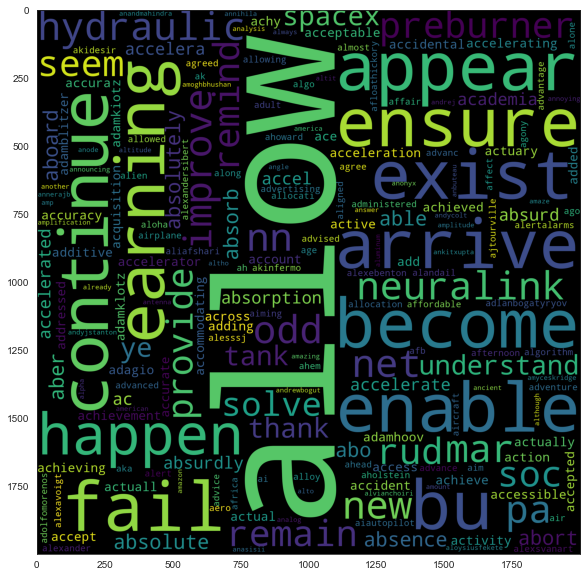

In [41]:
Review_wordcloud = ' '.join(data_1)
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [42]:
freq = pd.Series(' '.join(data_1).split()).value_counts()[0:20]
freq

taken         1
excellent     1
wpipperger    1
ufeufea       1
maxwell       1
chrome        1
tank          1
licensing     1
wsj           1
boops         1
lifemonths    1
many          1
sad           1
scalable      1
genetic       1
weak          1
haha          1
friend        1
absurd        1
steal         1
dtype: int64

In [43]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
from textblob import TextBlob

In [45]:
data['polarity'] = data['Tweets'].apply(lambda x: TextBlob(x).sentiment[0])

In [46]:
data[data.polarity>0].head(5)

,Unnamed: 0,Text,Tweets,polarity
2,3,,joerogan spotify great interview,0.800000
4,5,,teslacn congratulation tesla china amazing exe...,0.200000
5,6,,happy new year ox httpstcowfkmyuoj,0.468182
7,8,,owensparks flcnhvy anonyx haha thanks,0.200000
9,10,,entertaining outcome likely,0.250000


In [49]:
tweets = data.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb im alien,-0.250000
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge underestimated,0.000000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.152381
1995,1996,ppathole make sure read ur term amp condition ...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb dumber ufuf,-0.375000


In [50]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [51]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

positive
positive
neutral
positive
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
positive
neutral
neutral
negative
positive
neutral
positive
positive
negative
positive
positive
positive
positive
positive
neutral
positive
neutral
negative
negative
positive
positive
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
positive
negative
neutral
neutral
negative
neutral
neutral
neutral
positive
neutral
positive
neutral
negative
positive
neutral
neutral
negative
positive
neutral
positive
neutral
positive
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
positive
neutral
positive
positive
positive
neutral
positive
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
negative
positive
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
negat

In [52]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

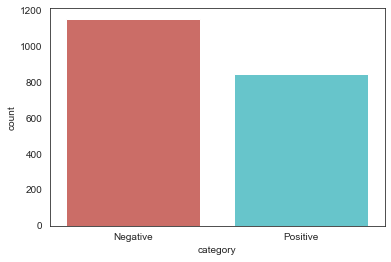

In [53]:
sns.countplot(x='category',data=tweets,palette='hls')

In [54]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    57.778889
Positive    42.221111
Name: category, dtype: float64

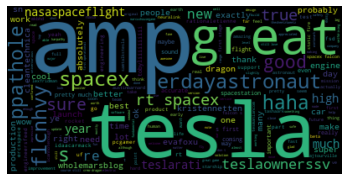

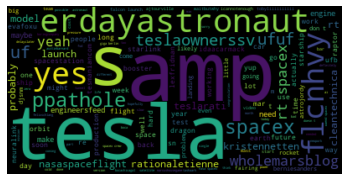

In [55]:
positive_reviews= tweets[tweets.category=='Positive']
negative_reviews= tweets[tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()